In [1]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4 r-base-core
Suggested packages:
  gvfs elpa-ess r-doc-info | r-doc-pdf r-mathlib r-base-html
Recommended packages:
  r-base-dev r-doc-html
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4 pkg-config
The following packages will be upgraded:
  r-base-core
1 upgra

In [2]:
!pip install  -qq -U transformers langgraph faiss-gpu-cu12 sentence-transformers langchain-community pymupdf pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 87.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 MB 40.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 70.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.5/438.5 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import langgraph
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

2025-05-31 18:08:35.446614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748714915.627473      76 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748714915.679727      76 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import numpy as np
import torch
from langchain_community.vectorstores import FAISS

In [5]:
model_name = "/kaggle/input/deepseek-r1/transformers/deepseek-r1-distill-qwen-1.5b/2"

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [7]:
# Initialize BAAI embeddings with GPU support
embedmodel = "BAAI/bge-base-en" # You can also use bge-base for smaller but faster model
model_kwargs = {'device': device}
encode_kwargs = {'batch_size': 128, 'device': device, 'normalize_embeddings': True}

In [8]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

In [9]:
from langchain.embeddings import HuggingFaceEmbeddings

In [10]:
embeddings = HuggingFaceEmbeddings(
    model_name=embedmodel,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

/tmp/ipykernel_76/4252575277.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/719 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
books = "/kaggle/input/harry-potter-books"

In [12]:
from langchain_community.document_loaders import DirectoryLoader, TextLoader

# Initialize the DirectoryLoader
loader = DirectoryLoader(
    path=books,
    glob="**/*.txt",  # Load all .txt files recursively
    loader_cls=TextLoader,  # Use TextLoader for .txt files
    show_progress=True,
    use_multithreading=True
)


In [13]:
documents = loader.load()

100%|██████████| 7/7 [00:00<00:00, 70.79it/s]


In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [15]:
# Initialize the character-based text splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2000,  # Number of characters per chunk
    chunk_overlap=300,  # Overlap between chunks
    separators=["\n\n", "\n", " ", ""],  # Prioritize semantic breaks
)

In [16]:
split_docs = text_splitter.split_documents(documents)

In [17]:
len(split_docs)

3729

In [18]:
vectordb_vectr = FAISS.from_documents(documents=split_docs, embedding=embeddings)

In [19]:
from transformers import AutoModel

In [20]:

# Load BGE reranker model and tokenizer once (outside the function)
reranker_tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-reranker-base")
reranker_model = AutoModel.from_pretrained("BAAI/bge-reranker-base")


tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaModel were not initialized from the model checkpoint at BAAI/bge-reranker-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
def retrieve_context(state):
    query = state["user_input"]

    # Step 1: Initial similarity search
    retrieved_docs = vectordb_vectr.similarity_search(query, k=10)  # get more docs for reranking
    pairs = [(query, doc.page_content) for doc in retrieved_docs]

    # Step 2: Format input for BGE reranker (BGE expects "[CLS] query [SEP] passage [SEP]")
    texts = [f"[CLS] {q} [SEP] {p} [SEP]" for q, p in pairs]
    inputs = reranker_tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    # Step 3: Compute relevance scores
    with torch.no_grad():
        model_output = reranker_model(**inputs)
        scores = model_output.last_hidden_state[:, 0, :]  # CLS token
        scores = torch.nn.functional.normalize(scores, p=2, dim=1)  # normalize if needed
        scores = scores[:, 0]  # Take only the first dim for ranking (simplified relevance proxy)

    # Step 4: Sort documents by score
    reranked = sorted(zip(scores, retrieved_docs), key=lambda x: x[0], reverse=True)
    top_docs = [doc.page_content for _, doc in reranked[:5]]

    # Step 5: Return updated state
    state["retrieved_docs"] = top_docs
    return state


In [22]:
test_state = {"user_input": "Name of Harry's grilfriend ?"}

In [23]:
result_state = retrieve_context(test_state)
result_state

{'user_input': "Name of Harry's grilfriend ?",
 'retrieved_docs': ["`What's - er - going on with you and her, anyway?' Ron asked quietly\n\n`Nothing,' said Harry truthfully.\n\n`I - er - heard she's going out with someone else now,' said Hermione tentatively.\n\nHarry was surprised to find that this information did not hurt at all. Wanting to impress Cho seemed to belong to a past that was no longer quite connected with him; so much of what he had wanted before Sinus',' death felt that «°av these days… the week\n\nthat had elapsed since he had last seen Sirius seemed to have lasted much, much longer; it stretched across two universes, the one with Sirius in it, and the one without.\n\n`You're well out of it, mate,' said Ron forcefully. `I mean, she's quite good-looking and all that, but you want someone a bit more cheerful.'\n\n`She's probably cheerful enough with someone else,' said Harry, shrugging.\n\n`Who's she with now, anyway?' Ron asked Hermione, but it was Ginny who answered.\n

In [24]:
def build_prompt(chat_history, retrieved_docs, user_input, feedback=None):
    system_prompt = (
        "You are a precise, factual assistant with expert knowledge of the Harry Potter Universe. "
        "You must answer ONLY using the information in the provided context. "
        "If the answer is not found in the context, state that clearly. Do NOT use prior knowledge. "
        "Maintain consistency with previous chat history and incorporate user feedback if provided. "
        "Avoid repetition, filler, or hallucinations. Your answer should be short, clear, and directly answer the question."
    )

    history = "\n".join([
        f"\nAssistant: {entry.get('Assistant', '')}"
        for entry in chat_history
    ])

    context = "\n".join(retrieved_docs)

    feedback_instructions = (
        "\n\nIncorporate the following user feedback to improve your response quality:"
        f"\n- {feedback}"
        if feedback else ""
    )

    prompt = (
        f"{system_prompt}\n\n"
        f"---\nOriginal Question:\n{user_input}\n---\n\n"
        f"---\nContext:\n{context}\n---\n\n"
        f"---\nChat History:\n{history}\n---"
        f"{feedback_instructions}\n\n"
        f"\nAssistant:"
    )

    return prompt


In [25]:
from langgraph.graph import StateGraph,END 
from typing_extensions import TypedDict

# Define the state schema
class ChatState(TypedDict):
    user_input: str
    chat_history: list
    retrieved_docs: list
    response: str
    feedback: str
    isExit : bool



In [26]:
import torch

def generate_response(state):
    last_chat = state["chat_history"][-1:] if state.get("chat_history") else []
    fdbck = state.get("feedback")

    print(f"\n🧑 User Feedback:\n {fdbck}")

    # print(f"\n========================\n{last_chat}\n\n{fdbck}\n========================\n")
    
    prompt = build_prompt(
        last_chat,
        state.get("retrieved_docs", []),
        state["user_input"],
        state.get("feedback")
    )

    # Tokenize and move inputs to GPU
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    outputs = model.generate(
        **inputs,
        max_new_tokens=512,
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.9,
        repetition_penalty=1.2,
        eos_token_id=tokenizer.eos_token_id
    )
    
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    state["response"] = response.split("Assistant:")[-1].strip()

    response = state.get("response", "")
    print(f"\n🤖 Assistant:\n {response}")

    history = {"Assistant":response}
    
    state['chat_history'].append(history)

    return state


In [27]:
def collect_feedback(state: ChatState) -> str:
    
    feedback = input("\nWas this response helpful? (yes/no/exit): ").strip().lower()
    state["feedback"] = "Not Available"
    
    if feedback == "yes" or feedback == "exit":
        state["isEnd"] = True
    
    else:
        new_input = input("\nPlease provide more details or rephrase your question: ")
        state["feedback"] = new_input
        state["isEnd"] = False


    return state
    



In [28]:
def decide_next_node(state):
    if state.get('isEnd') == True: 
        return "end" 
    elif state.get('isEnd') == False : 
        return "loop" 

In [29]:

builder = StateGraph(state_schema=ChatState)

builder.add_node("retrieve", retrieve_context)
builder.add_node("generate", generate_response)
builder.add_node("feedback_path", collect_feedback)

# Set the entry point
builder.set_entry_point("retrieve")

# Add edges
builder.add_edge("retrieve", "generate")
builder.add_edge("generate", "feedback_path")

# Add conditional edges based on feedback
builder.add_conditional_edges(
    "feedback_path",
    decide_next_node,
    {
        "end": END,
        "loop": "generate",
    }
)

# Compile the graph
graph = builder.compile()

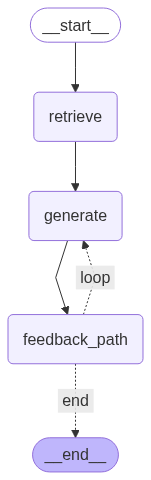

In [30]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [31]:

user_input = input("You: ")
state = {
    "user_input": user_input,
    "chat_history": [],
    "isExit" : False
}
state = graph.invoke(state)


You:  Give me 5 names of Harry's friends ?


Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.



🧑 User Feedback:
 None

🤖 Assistant:
 Okay, so I'm supposed to figure out the answer based on the given context. Let me read through carefully.

The original question asks for "five names of Harry's friends." Looking at the context, I notice several instances of Harry interacting with different characters. 

In the first part, Harry mentions his friends during a conversation involving Lavender, Hermione, and others. One line says, "Harry ran across a bench" referring to someone named Malfoy. Then, towards the end, he talks about his teammates including Ron, Hermione, and others. However, among these, Hermione isn't explicitly mentioned except indirectly because she has sisters like Katie and Lily (though her full name isn't highlighted). 

Looking further down, there are paragraphs discussing various interactions between Harry and his companions. In particular, when talking about the Quidditch matches, Harry comments on his friends being called Crabbe and Goyle, along with others. But


Was this response helpful? (yes/no/exit):  no

Please provide more details or rephrase your question:  Just give me 5 names..no bullshit..!!


Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.



🧑 User Feedback:
 Just give me 5 names..no bullshit..!!

🤖 Assistant:
 Alright, so I've got this query about Harry Potter friends. They're asking for five names, and I need to provide only concise responses without adding extra info or fluff. First, I'll look at the context again to identify any direct references to individuals. 

One notable spot is when Harry speaks about his team members in the Quidditch match scenario. He mentions Crabbe and Goyle, indicating two of his friends. There's also the interaction where Hermione gets confused due to the incorrect saving attempts, leading her to smile. This suggests that Hermione is involved in the story alongside Harry. 

Additionally, in the sections where Hermione discusses her role—such as her teacher reference—it reinforces her presence in the narrative. Even though her exact identity isn't detailed, her influence allows me to infer her character despite lacking specifics.

Considering that, the main identifiable friends are Ron, Her


Was this response helpful? (yes/no/exit):  exit
